<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_06_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [3]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')


In [4]:
total_file_link

['/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv',
 '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.6_azimuth_5_mu_0.15_alpha_negetive_1.7.csv',
 '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.7_azimuth_10_mu_0.15_alpha_negetive_1.7.csv']

In [5]:
pd.read_csv(total_file_link[2])

,r/R,mean_delta_x,std_delta_x,mean_delta_y,std_delta_y,mean_delta_z,std_delta_z
0,0.2001,0.0434,0.0026,-0.0126,0.0013,-0.0162,0.0040
1,0.2499,-0.0157,0.0019,-0.0235,0.0031,-0.0061,0.0079
2,0.2998,-0.0418,0.0016,-0.0514,0.0053,-0.0781,0.0130
3,0.3498,-0.0550,0.0016,-0.0961,0.0091,-0.1268,0.0216
4,0.3913,-0.0646,0.0024,-0.1332,0.0133,-0.1839,0.0303
5,0.4496,-0.1020,0.0026,-0.1704,0.0173,-0.3251,0.0405
6,0.4997,-0.1255,0.0030,-0.2004,0.0207,-0.4803,0.0503
7,0.5387,-0.1535,0.0028,-0.2193,0.0230,-0.6758,0.0569
8,0.5996,-0.1964,0.0031,-0.2466,0.0273,-0.9893,0.0678
9,0.6498,-0.2235,0.0031,-0.2726,0.0316,-1.3829,0.0783


In [9]:
total_alpha_content = [ i / 1000 for i in range(1 , 901 ) ]
total_flat_content  = [ i for i in range(1 , 10 ) ]
total_location      = list(range( 10 , 16))

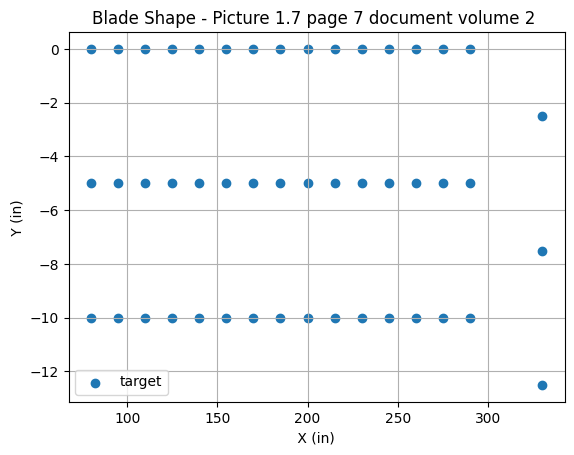

In [10]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()


In [11]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'accuracy_nav' : [] ,
    'accuracy_svm_svc' : [] ,
    'accuracy_random_forest' : [] ,
    'accuracy_extra' : [] ,
    'accuraacy_ann'  : []
}

Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 10   --  Iter : 0  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 10   --  Iter : 1  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 10   --  Iter : 2  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 10   --  Iter : 3  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 10   --  Iter : 4  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Dat

<ipython-input-19-d7560f68b469>:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(30, 10))


Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 14   --  Iter : 2  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 14   --  Iter : 3  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 14   --  Iter : 4  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 15   --  Iter : 0  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation/Table_2.1.5_azimuth_0_mu_0.15_alpha_negetive_1.7.csv  --  Locate : 15   --  Iter : 1  --  
Alpha : 0.001  Table Change : /content/drive/MyDrive/Malek_Master/code/Total_Dat

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

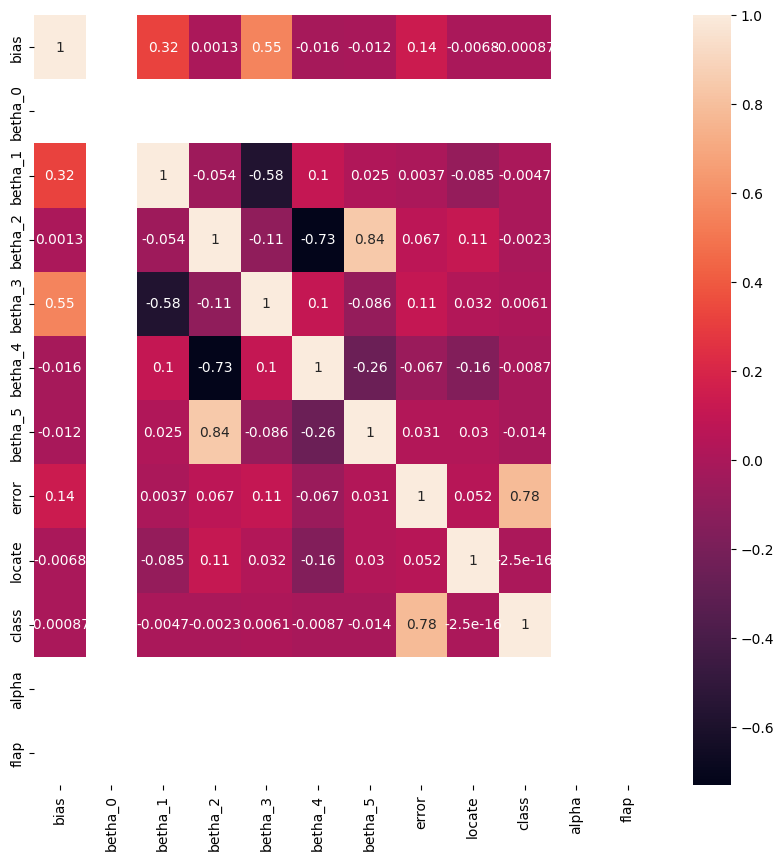

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - acc: 0.3064 - loss: 1.6356 - val_acc: 0.3492 - val_loss: 1.2462
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2517 - loss: 1.5445 - val_acc: 0.3228 - val_loss: 1.1979
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4240 - loss: 1.2976 - val_acc: 0.3280 - val_loss: 1.1680
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3624 - loss: 1.2765 - val_acc: 0.3280 - val_loss: 1.1452
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3526 - loss: 1.3407 - val_acc: 0.3333 - val_loss: 1.1213
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4032 - loss: 1.1590 - val_acc: 0.3439 - val_loss: 1.0954
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4185 - loss: 1.0824 - val_acc: 0.3968 - val_loss: 1.0652
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3880 - loss: 1.0966 - val_acc: 0.4603 - val_loss: 1.0313
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3567 - loss: 1.1130 - val

In [19]:
params_health  = []
params_fault   = []
params_fault_t = []
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(5):
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location = 0
          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              if select_location == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add






              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])






          new_data_simulated_        = np.array(new_data_simulated_)
          new_data_simulated_fault   = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t = np.array(new_data_simulated_fault_t)


          fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                    df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error = []
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error.append(error)


          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]
          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault.append(error_Fault)

          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  1 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault.append(error_Fault)

          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]




#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'error' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )



    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'error' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'error' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )







    concat_2_df_health_fault = pd.concat([df_params , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    plt.figure(figsize= (10 , 10 ) )
    ax = sns.heatmap(df_corr , annot=True )
    print(df_corr)
    plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['bias_correlation'].append(df_corr.iloc[0,-1])
    total_simulation['betha_1_correlation'].append(df_corr.iloc[1,-1])
    total_simulation['betha_2_correlation'].append(df_corr.iloc[2,-1])
    total_simulation['betha_3_correlation'].append(df_corr.iloc[3,-1])
    total_simulation['betha_4_correlation'].append(df_corr.iloc[4,-1])
    total_simulation['betha_5_correlation'].append(df_corr.iloc[1,-1])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    col_pass = [ _ for _ in concat_2_df_health_fault.columns if _ not in ['class' , 'alpha' , 'flap']]
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    concat_2_df_health_fault_stand = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.7  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    total_simulation['accuracy_nav'].append(accuray_nav)
    classifier_1 = RandomForestClassifier()
    classifier_1.fit(x_u_train , y_u_train )
    pre_random = classifier_1.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    y_u_test_new_cat  = to_categorical(y_u_test  , 3 )
    y_u_train_new_cat = to_categorical(y_u_train , 3 )
    model_learn = Sequential([
      Dense(32 , activation = "relu" , input_shape = x_u_train.shape[1 : ] ) ,
      Dropout(0.2) ,
      Dense(10 , activation='relu' ) ,
      Dropout(0.2) ,
      Dense(3 , activation='softmax')])

    model_learn.compile('adam' , loss = 'categorical_crossentropy' , metrics=['acc'])
    ali_talebi = model_learn.fit(x_u_train ,y_u_train_new_cat , epochs = 100 , batch_size=20 , validation_data=(x_u_test ,y_u_test_new_cat) )


    break
  break


In [20]:
total_simulation

{'bias_correlation': [nan, nan, nan, nan, nan, nan],
 'betha_1_correlation': [nan, nan, nan, nan, nan, nan],
 'betha_2_correlation': [nan, nan, nan, nan, nan, nan],
 'betha_3_correlation': [nan, nan, nan, nan, nan, nan],
 'betha_4_correlation': [nan, nan, nan, nan, nan, nan],
 'betha_5_correlation': [nan, nan, nan, nan, nan, nan],
 'alpha': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'accuracy_nav': [0.6613756613756614, 0.5925925925925926],
 'accuracy_svm_svc': [],
 'accuracy_random_forest': [0.6402116402116402, 0.6190476190476191],
 'accuracy_extra': [],
 'accuraacy_ann': []}